In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Read in titanic training data
titanic_df = pd.read_csv("../_Data/train_with_ages.csv")
titanic_testing_df = pd.read_csv("../_Data/test_with_ages.csv")
titanic_submission_df = titanic_testing_df

In [3]:
# Set the fare to '0' for titanic_testing_df index '152'
def add_fare_values(fare):
    if fare >= 0:
        return fare
    else:
        return 0

titanic_testing_df['Fare'] = titanic_testing_df.apply(lambda row: add_fare_values(row['Fare']), axis=1)

In [4]:
# Drop columns that data that will not likely be helpful
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
titanic_testing_df = titanic_testing_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [5]:
# Convert Female to 0 and Male to 1
titanic_df = titanic_df.replace('female', 0)
titanic_df = titanic_df.replace('male', 1)

titanic_testing_df = titanic_testing_df.replace('female', 0)
titanic_testing_df = titanic_testing_df.replace('male', 1)

In [6]:
# Convert pandas dataframe into numpy array
titanic_np = titanic_df.to_numpy()
titanic_testing_np = titanic_testing_df.to_numpy()
print(f'Shape of titanic_np: {titanic_np.shape}')
print(f'Shape of titanic_testing_np: {titanic_testing_np.shape}')

Shape of titanic_np: (891, 7)
Shape of titanic_testing_np: (418, 6)


In [7]:
# Create separate numpy arrays for features and labels
titanic_features = titanic_np[:, 1:]
titanic_labels = titanic_np[:, 0:1]
titanic_testing_features = titanic_testing_np

print(f'Shape of titanic_features: {titanic_features.shape}')
print(f'Shape of titanic_labels: {titanic_labels.shape}')
print(f'Shape of titanic_testing_features: {titanic_testing_features.shape}')

Shape of titanic_features: (891, 6)
Shape of titanic_labels: (891, 1)
Shape of titanic_testing_features: (418, 6)


In [8]:
# Split the data into 90% training and 10% testing
features_train, features_test, labels_train, labels_test = train_test_split(titanic_features, titanic_labels, test_size=0.10, random_state=10)

print(f'Shape of features_train: {features_train.shape}')
print(f'Shape of labels_train: {labels_train.shape}')
print(f'Shape of features_test: {features_test.shape}')
print(f'Shape of labels_test: {labels_test.shape}')

Shape of features_train: (801, 6)
Shape of labels_train: (801, 1)
Shape of features_test: (90, 6)
Shape of labels_test: (90, 1)


In [9]:
# Perform a grid search for the chosen classifier
def grid_search(classifier, param_grid):
    classifier = GridSearchCV(classifier, param_grid, verbose=0, n_jobs=-1)
    classifier.fit(features_train, labels_train)
    classifier.best_params_
    print(classifier.best_params_)
    print(f'Best score: {classifier.best_score_}')

# Train and validate the model for the chosen classifier
def train_validate_model(model, algorithm):
    model = model.fit(features_train, labels_train)
    labels_predict = model.predict(features_test)

    accuracy = accuracy_score(labels_predict, labels_test)
    print(f"Accuracy for {algorithm}: {accuracy:.3f}")

    return model

# Predict Survived labels for testing dataset
def predict_testing_labels(model):
    labels_testing_predict = model.predict(titanic_testing_features)
    return labels_testing_predict

In [10]:
# Grid Search for Decision Tree Classifier
algorithm = "ANN"

if algorithm == "DT":
    dtc_grid_search = tree.DecisionTreeClassifier()
    param_grid = {'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]}
    grid_search(dtc_grid_search, param_grid)
elif algorithm == "LogReg":
    log_reg_grid_search = LogisticRegression()
    param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2.0]}
    grid_search(log_reg_grid_search, param_grid)
elif algorithm == "KNN":
    KNN_grid_search = KNeighborsClassifier()
    param_grid = {'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 6, 10, 12, 14, 16, 18, 20, 30, 40], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
    grid_search(KNN_grid_search, param_grid)
elif algorithm == "SVC":
    SVC_grid_search = SVC()
    param_grid = {'kernel': ['linear', 'rbf', 'sigmoid'], 'C': [0.01, 0.2, 0.6, 1], 'gamma': ['scale', 'auto']}
    grid_search(SVC_grid_search, param_grid)

In [11]:
# Decision Tree Classifier training and validation
if algorithm == "DT":
    dtc = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=24)
    model = train_validate_model(dtc, algorithm)
    labels_testing_predict = predict_testing_labels(model)
elif algorithm == "LogReg":
    log_reg = LogisticRegression(penalty='l2', C=0.2)
    model = train_validate_model(log_reg, algorithm)
    labels_testing_predict = predict_testing_labels(model)
elif algorithm == "KNN":
    knn = KNeighborsClassifier(algorithm='brute', n_neighbors=30, weights='distance')
    model = train_validate_model(knn, algorithm)
    labels_testing_predict = predict_testing_labels(model)
elif algorithm == "SVC":
    svc = SVC(C=0.2, gamma='scale', kernel='linear')
    model = train_validate_model(svc, algorithm)
    labels_testing_predict = predict_testing_labels(model)

 - val_loss: 0.3880 - val_accuracy: 0.8444
Epoch 65/200
801/801 [==============================] - 0s 123us/step - loss: 0.4423 - accuracy: 0.8152 - val_loss: 0.3528 - val_accuracy: 0.8333
Epoch 66/200
801/801 [==============================] - 0s 137us/step - loss: 0.4273 - accuracy: 0.8090 - val_loss: 0.3482 - val_accuracy: 0.8444
Epoch 67/200
801/801 [==============================] - 0s 129us/step - loss: 0.4326 - accuracy: 0.8015 - val_loss: 0.3450 - val_accuracy: 0.8444
Epoch 68/200
801/801 [==============================] - 0s 148us/step - loss: 0.4181 - accuracy: 0.8140 - val_loss: 0.3713 - val_accuracy: 0.8556
Epoch 69/200
801/801 [==============================] - 0s 169us/step - loss: 0.4148 - accuracy: 0.8202 - val_loss: 0.3498 - val_accuracy: 0.8222
Epoch 70/200
801/801 [==============================] - 0s 164us/step - loss: 0.4070 - accuracy: 0.8315 - val_loss: 0.3553 - val_accuracy: 0.8333
Epoch 71/200
801/801 [==============================] - 0s 146us/step - loss: 0.4

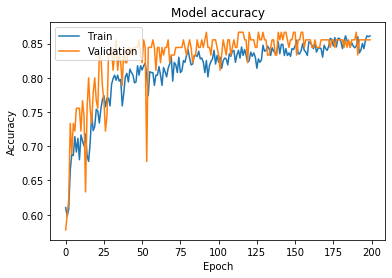

In [15]:
if algorithm == "ANN":
    # Convert the labels to one-hot encoding.
    n_classes = 2
    labels_train = np_utils.to_categorical(titanic_labels, n_classes)
    print(f'Shape of one hot encoded labels_train: {labels_train.shape}')

    # Add a 32 node hidden layer with sigmoid activation function.
    n_features = titanic_features.shape[1]

    model = Sequential()
    #model.add(Dropout(0.2))
    model.add(Dense(512, input_dim=n_features, activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(512, input_dim=n_features, activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(512, input_dim=n_features, activation='relu'))
    model.add(Dense(n_classes, input_dim=n_features, activation='softmax'))

    # Compile your model with accuracy as your metric.
    opt=Adam(lr=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model.
    model_history = model.fit(titanic_features, labels_train, epochs=200, batch_size=128, validation_split=0.10)

    # Predict the test set labels.
    labels_testing_predict = model.predict(titanic_testing_features)
    labels_testing_predict = np.argmax(labels_testing_predict, axis=-1)

    # Plot training & validation accuracy values
    plt.plot(model_history.history['accuracy'])
    plt.plot(model_history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [16]:
# Convert numpy labels array to dataframe
labels_testing_predict_df = pd.DataFrame(labels_testing_predict, index=None, columns=['Survived'])

In [17]:
# Copy the predicted survival labels to the submission dataframe and change column to int64
titanic_submission_df['Survived'] = labels_testing_predict_df['Survived']
titanic_submission_df['Survived'] = titanic_submission_df['Survived'].astype('int64')

In [18]:
# Drop all columns not needed for submission.
titanic_submission_df_final = titanic_submission_df.drop(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)

In [19]:
# Write to CSV results file
titanic_submission_df_final.to_csv('../_Submission/009_Ryan_Submission_ANN.csv', index=False)

## Model results versus the 10% test set:

Test set accuracy for Decision Tree: 0.833

Test set accuracy for Logistic Regression: 0.811

Test set accuracy for KNN: 0.744

Test set accuracy for SVC: 0.822

Test set accuracy for ANN: 0.824